<a href="https://colab.research.google.com/github/nadrianTDF/MachineLearning/blob/main/Clase2_MDD_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad: Exploración y Tratamiento de Datos con Pandas y Polars

## Instrucciones

En esta actividad, deberás realizar un análisis exploratorio de datos utilizando las bibliotecas Pandas y Polars en Python. Los datos serán generados de manera ficticia y contendrán valores nulos y outliers, los cuales deberás identificar y tratar adecuadamente.

### Objetivos

- Comparar el uso de Pandas y Polars para la manipulación de datos.
- Identificar y tratar valores nulos y outliers en un conjunto de datos.
- Aplicar diferentes estrategias para el tratamiento de valores nulos utilizando ambas bibliotecas.

##Tareas

1. **Generación de Datos Ficticios:**
   - Utiliza la biblioteca Faker para generar un conjunto de datos que incluya nombres, edades, ingresos y ciudades. Introduce valores nulos y outliers en el dataset.

En primer lugar se procedio a instalar la libreria Faker.

In [ ]:
!pip install faker
!pip install polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.7 MB/s eta 0:00:00


A continuacion se cargaron todas las librerias necesarias para el trabajo y se procedio a generar el dataset.

In [ ]:
import pandas as pd
import polars as pl
from faker import Faker
import numpy as np

faker = Faker()

cant = 100000

# Generar datos ficticios
banco = {
    'Name': [faker.name() for _ in range(cant)],
    'Age': [faker.random_int(min=18, max=80) for _ in range(cant)],
    'Income': [faker.random_number(digits=5) for _ in range(cant)],
    'Job' : [faker.job() for _ in range(cant)],
    'Phone': [faker.phone_number() for _ in range(cant)],
    'City': [faker.city() for _ in range(cant)]
}

# Introducir valores nulos aleatoriamente en 'Income'
for _ in range(300):  # Añadir 300 valores nulos
    banco['Income'][np.random.randint(0, cant)] = None

# Introducir valores nulos aleatoriamente en 'Phone'
for _ in range(50):  # Añadir 50 valores nulos
    banco['Phone'][np.random.randint(0, cant)] = None

# Introducir outliers en 'Age'
banco['Age'][np.random.randint(0, cant)] = 110  # Añadir un outlier extremo


Se generaron tambien los 2 dataframes requeridos para el trabajo (Pandas y Polars).

In [ ]:
df_pandas = pd.DataFrame(banco)
# Mostrar los primeros registros de cada DataFrame
print("Pandas DataFrame:")
print(df_pandas.head(5))

Pandas DataFrame:
                   Name  Age   Income                    Job  \
0          Robert Perez   46  82388.0    Designer, furniture   
1      Andrew Fernandez   28  42571.0  Clinical embryologist   
2        Shawn Phillips   18   5368.0                  Actor   
3  Dr. Wanda Livingston   42  65048.0      Systems developer   
4        Ashley Chapman   36  85896.0   Pharmacist, hospital   

              Phone              City  
0     (767)850-9714        Jerrymouth  
1   +1-438-678-2538         Tammyfurt  
2     (637)645-8908  East Christopher  
3  001-886-423-0930   New Carlosmouth  
4  001-874-619-3454      Scottborough  


In [ ]:
df_polars = pl.DataFrame(banco)
print("\nPolars DataFrame:")
print(df_polars.head(5))


Polars DataFrame:
shape: (5, 6)
┌──────────────────────┬─────┬────────┬──────────────────────┬──────────────────┬──────────────────┐
│ Name                 ┆ Age ┆ Income ┆ Job                  ┆ Phone            ┆ City             │
│ ---                  ┆ --- ┆ ---    ┆ ---                  ┆ ---              ┆ ---              │
│ str                  ┆ i64 ┆ i64    ┆ str                  ┆ str              ┆ str              │
╞══════════════════════╪═════╪════════╪══════════════════════╪══════════════════╪══════════════════╡
│ Robert Perez         ┆ 46  ┆ 82388  ┆ Designer, furniture  ┆ (767)850-9714    ┆ Jerrymouth       │
│ Andrew Fernandez     ┆ 28  ┆ 42571  ┆ Clinical             ┆ +1-438-678-2538  ┆ Tammyfurt        │
│                      ┆     ┆        ┆ embryologist         ┆                  ┆                  │
│ Shawn Phillips       ┆ 18  ┆ 5368   ┆ Actor                ┆ (637)645-8908    ┆ East Christopher │
│ Dr. Wanda Livingston ┆ 42  ┆ 65048  ┆ Systems developer 

2. **Análisis Exploratorio de Datos:**
   - Realiza un análisis exploratorio de los datos generados, incluyendo la identificación de valores nulos, la generación de resúmenes estadísticos y la verificación de los tipos de datos.

Una vez generado nuestros dataset, el siguiente paso fue realizar un análisis exploratorio inicial. Este análisis incluye la verificación de la cantidad de valores nulos, exploración de los tipos de datos y la generación de resúmenes estadísticos básicos. Estos pasos son fundamentales para entender la estructura y calidad de los datos con los que estamos trabajando.

#### Verificación de Valores Nulos

Los valores nulos pueden afectar significativamente la calidad de los análisis y modelos predictivos. Es crucial identificar y entender la cantidad de valores nulos en nuestro dataset.

#### Resumen Estadístico

El resumen estadístico nos proporciona una visión rápida de las tendencias centrales, la dispersión y la forma de la distribución de los datos.

#### Tipos de Datos

Comprender los tipos de datos es esencial para asegurar que las operaciones de datos se realicen correctamente sin errores de tipo.


In [ ]:
# Pandas: Análisis de valores nulos
print("Pandas - Valores Nulos por Columna:")
print(df_pandas.isnull().sum())

# Pandas: Resumen estadístico
print("\nPandas - Resumen Estadístico:")
print(df_pandas.describe())

# Pandas: Tipos de datos
print("\nPandas - Tipos de Datos:")
print(df_pandas.dtypes)

Pandas - Valores Nulos por Columna:
Name        0
Age         0
Income    300
Job         0
Phone      50
City        0
dtype: int64

Pandas - Resumen Estadístico:
                Age        Income
count  5.000000e+06  4.999700e+06
mean   4.900353e+01  4.998550e+04
std    1.818486e+01  2.886390e+04
min    1.800000e+01  0.000000e+00
25%    3.300000e+01  2.499100e+04
50%    4.900000e+01  4.999100e+04
75%    6.500000e+01  7.498200e+04
max    1.100000e+02  9.999900e+04

Pandas - Tipos de Datos:
Name       object
Age         int64
Income    float64
Job        object
Phone      object
City       object
dtype: object


In [ ]:
# Polars: Análisis de valores nulos
print("\nPolars - Valores Nulos por Columna:")
print(df_polars.null_count())

# Polars: Resumen estadístico
print("\nPolars - Resumen Estadístico:")
print(df_polars.describe())

# Polars: Tipos de datos
print("\nPolars - Tipos de Datos:")
print(df_polars.schema)


Polars - Valores Nulos por Columna:
shape: (1, 6)
┌──────┬─────┬────────┬─────┬───────┬──────┐
│ Name ┆ Age ┆ Income ┆ Job ┆ Phone ┆ City │
│ ---  ┆ --- ┆ ---    ┆ --- ┆ ---   ┆ ---  │
│ u32  ┆ u32 ┆ u32    ┆ u32 ┆ u32   ┆ u32  │
╞══════╪═════╪════════╪═════╪═══════╪══════╡
│ 0    ┆ 0   ┆ 300    ┆ 0   ┆ 50    ┆ 0    │
└──────┴─────┴────────┴─────┴───────┴──────┘

Polars - Resumen Estadístico:
shape: (9, 7)
┌────────────┬──────────────┬───────────┬──────────────┬──────────────┬──────────────┬─────────────┐
│ describe   ┆ Name         ┆ Age       ┆ Income       ┆ Job          ┆ Phone        ┆ City        │
│ ---        ┆ ---          ┆ ---       ┆ ---          ┆ ---          ┆ ---          ┆ ---         │
│ str        ┆ str          ┆ f64       ┆ f64          ┆ str          ┆ str          ┆ str         │
╞════════════╪══════════════╪═══════════╪══════════════╪══════════════╪══════════════╪═════════════╡
│ count      ┆ 5000000      ┆ 5e6       ┆ 4.9997e6     ┆ 5000000      ┆ 4999950     

3. **Tratamiento de Valores Nulos:**
   - Implementa diferentes estrategias para tratar los valores nulos: eliminación de filas, imputación con la media, y asignación de un valor específico.

Los valores nulos pueden ser un indicativo de datos perdidos, errores durante la recopilación de datos o entradas no aplicables. El tratamiento adecuado de estos valores es esencial para realizar análisis precisos y evitar resultados erróneos. Existen varias estrategias para manejar los valores nulos. En nuestro caso vamos a utilizar las siguientes:

- **Eliminación**: Remover las filas o columnas que contienen valores nulos.
- **Imputación**: Sustituir los valores nulos por un valor estimado, como la media, mediana o moda de la columna.
- **Marcado**: En algunos casos, puede ser útil convertir valores nulos en un valor específico que indique "desconocido" o "no aplicable".

A continuacion implementamos estas estrategias usando Pandas y Polars.


In [ ]:
# Pandas: Estrategias de tratamiento de valores nulos
# Imprimir datos originales para poder comparar los resultados

print("Pandas - Dataframe original:")
print(df_pandas.isnull().sum())
print(df_pandas['Name'].count())

# Eliminación de filas con valores nulos
df_pandas_dropped = df_pandas.dropna()

print("Pandas - Dataframe con datos nulos eliminados:")
print(df_pandas_dropped.isnull().sum())
print(df_pandas_dropped['Name'].count())

# Imputación con la media
df_pandas_filled_mean = df_pandas.fillna(df_pandas['Income'].mean())

print("Pandas - Dataframe con datos nulos rellenados:")
print(df_pandas_filled_mean.isnull().sum())
print(df_pandas_filled_mean['Name'].count())

# Imputación con un valor específico (en este caso "-1" para los datos desconocidos,
# y poder discernir de los datos con valor "0")
df_pandas_filled_specific = df_pandas.fillna({'Income': -1})

print("Pandas - Dataframe con datos nulos marcados:")
print(df_pandas_filled_specific.isnull().sum())
print(df_pandas_filled_specific['Name'].count())

Pandas - Dataframe original:
Name        0
Age         0
Income    300
Job         0
Phone      50
City        0
dtype: int64
5000000
Pandas - Dataframe con datos nulos eliminados:
Name      0
Age       0
Income    0
Job       0
Phone     0
City      0
dtype: int64
4999650
Pandas - Dataframe con datos nulos rellenados:
Name      0
Age       0
Income    0
Job       0
Phone     0
City      0
dtype: int64
5000000
Pandas - Dataframe con datos nulos marcados:
Name       0
Age        0
Income     0
Job        0
Phone     50
City       0
dtype: int64
5000000


In [ ]:
# Polars: Estrategias de tratamiento de valores nulos
# Imprimir datos originales para poder comparar los resultados
print("Polar - Dataframe original:")
print(df_polars.null_count())
print(df_polars['Name'].count())

# Eliminación de filas con valores nulos
df_polars_dropped = df_polars.drop_nulls()

print("Polar - Dataframe con datos nulos eliminados:")
print(df_polars_dropped.null_count())
print(df_polars_dropped['Name'].count())

# Imputación con la media
# Imputar la media a los valores nulos en "columna_con_nulos"
df_polars_filled_mean = df_polars.with_columns(pl.col("Income").fill_null(strategy="mean"))

print("Polar - Dataframe con datos nulos rellenados:")
print(df_polars_filled_mean.null_count())
print(df_polars_filled_mean['Name'].count())

# Imputación con un valor específico
# Imputar el valor "error" a los valores nulos en "Phone"
df_polar_filled_specific = df_polars.with_columns(pl.col("Phone").fill_null("no disponible"))

print("Polar - Dataframe con datos nulos marcados:")
print(df_polar_filled_specific.null_count())
print(df_polar_filled_specific['Name'].count())

# Imputación con un valor específico
# Imputar el valor "error" a los valores nulos en "Phone" pero al dataframe
# donde ya se relleno "Income" con la media.

df_polars_filled_mean_specific = df_polars_filled_mean.with_columns(pl.col("Phone").fill_null("no disponible"))

print("Polar - Dataframe con datos nulos rellenoo y marcados:")
print(df_polars_filled_mean_specific.null_count())
print(df_polars_filled_mean_specific['Name'].count())

Polar - Dataframe original:
shape: (1, 6)
┌──────┬─────┬────────┬─────┬───────┬──────┐
│ Name ┆ Age ┆ Income ┆ Job ┆ Phone ┆ City │
│ ---  ┆ --- ┆ ---    ┆ --- ┆ ---   ┆ ---  │
│ u32  ┆ u32 ┆ u32    ┆ u32 ┆ u32   ┆ u32  │
╞══════╪═════╪════════╪═════╪═══════╪══════╡
│ 0    ┆ 0   ┆ 300    ┆ 0   ┆ 50    ┆ 0    │
└──────┴─────┴────────┴─────┴───────┴──────┘
5000000
Polar - Dataframe con datos nulos eliminados:
shape: (1, 6)
┌──────┬─────┬────────┬─────┬───────┬──────┐
│ Name ┆ Age ┆ Income ┆ Job ┆ Phone ┆ City │
│ ---  ┆ --- ┆ ---    ┆ --- ┆ ---   ┆ ---  │
│ u32  ┆ u32 ┆ u32    ┆ u32 ┆ u32   ┆ u32  │
╞══════╪═════╪════════╪═════╪═══════╪══════╡
│ 0    ┆ 0   ┆ 0      ┆ 0   ┆ 0     ┆ 0    │
└──────┴─────┴────────┴─────┴───────┴──────┘
4999650
Polar - Dataframe con datos nulos rellenados:
shape: (1, 6)
┌──────┬─────┬────────┬─────┬───────┬──────┐
│ Name ┆ Age ┆ Income ┆ Job ┆ Phone ┆ City │
│ ---  ┆ --- ┆ ---    ┆ --- ┆ ---   ┆ ---  │
│ u32  ┆ u32 ┆ u32    ┆ u32 ┆ u32   ┆ u32  │
╞══════╪════

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4. **Comparación entre Pandas y Polars:**
- Compara los resultados obtenidos utilizando Pandas y Polars en cada uno de los pasos anteriores.

En primer lugar se pudo observar que ambas librerias cumplen con la tareas solicitadas sin inconvenientes. Los datos obtenidos en ambos analisis coinciden en los resultados.

En segundo lugar, se puede destacar que la libreria Polars tiene como caracteristica una mejor presentacion de los datos en pantalla, ya que les asigna un formato de tabla, lo que hace un poco mas facil su lectura.

Tambien se realizo una comparacion en los tiempos de ejecucion, donde se comparan no solo los tiempos entre ambas librerias, sino tambien los tiempos empleados por los distintos entornos que brinda Colab para realizar las tareas. Los mismos se pueden observar en la siguiente imagen:

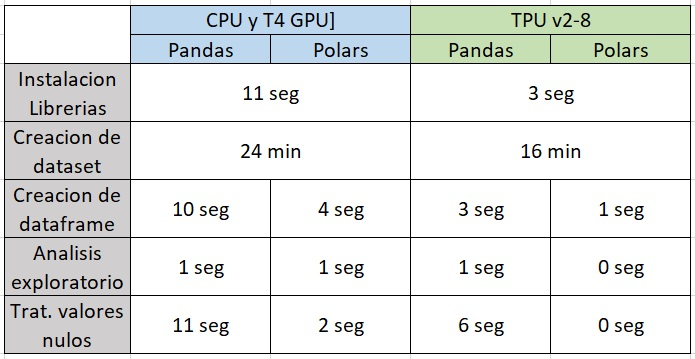

Inicialmente se realizaron las pruebas con un dataset de 100.000 datos, pero no se apreciaban diferencias en los tiempos de ejecucion. Para hacer un analisis de los tiempos mas profundo, se realizo una prueba con 5.000.000 de registros y se pudo observar que la libreria Polars presenta una mejor performance que Pandas. La misma presento mejoras desde un 60% hasta un 83% segun la tarea medida.

Tambien se pudo observar que el entorno TPU v2-8 tiene un rendimiento notablemente mayor que en los otros entornos. En general podriamos decir que segun el tipo de tarea, este entorno fue desde un 50% hasta un 75% mas rapido.
